### Text Analysis
#### Data
The dataset used for this text analysis is obtained from UCI.
https://archive.ics.uci.edu/ml/datasets/Reuter_50_50 This link contains the data for 50 authors. For this analysis the text from one of the author is used. This notebook makes use of nltk package for text analysis


In [1]:
#Import required pacakges
from urllib import urlopen
import numpy as np
import nltk as nltk
import matplotlib
import matplotlib.pyplot as plt
#Plots the graphs inline
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10)

### Read file  
Let's read the text file and look at first few characters.

In [2]:
txt = urlopen("https://raw.githubusercontent.com/mkds/MSDA/master/DATA620/DATA/news.txt").read()
txt[0:50]

'U.S. Senators on Tuesday sharply criticized a new '

#### Tokens
In order to get list of words, let's use nltk's tokenize function. Let's check how many total words are in the document and the number of unique words.

In [3]:
tokens = nltk.word_tokenize(txt)
print "Number of words:", len(tokens)
#Get unique words
unique_words=set(tokens)
print "Unique words count:", len(unique_words)

Number of words: 28098
Unique words count: 3772


#### Word frequency 
Let's compute word frequence and try to get unique words that represent half of the words in the corpus.

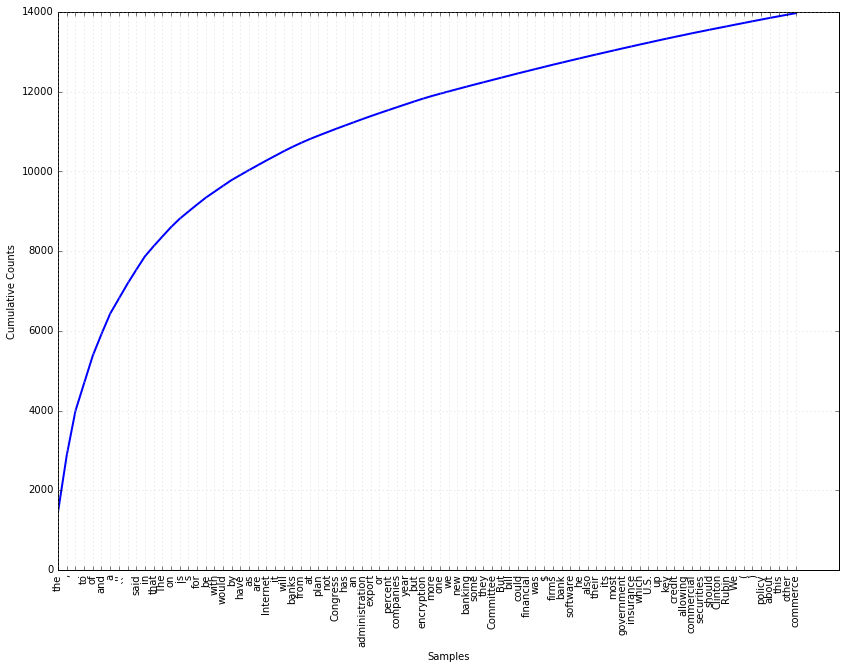

In [4]:
word_freq=nltk.FreqDist(tokens)
word_freq.plot(86, cumulative=True)

As we could see from about graph about 86 words make up about 14000 words in the corpus which is half the size of the corpus.  

### Top 200 words

In [5]:
top200=word_freq.most_common(200)
print "Top 200 words by frequency" 
print [w for w,freq in top200]


Top 200 words by frequency
['the', ',', '.', 'to', 'of', 'and', 'a', "''", '``', 'said', 'in', 'that', 'The', 'on', 'is', "'s", 'for', 'be', 'with', 'would', 'by', 'have', 'as', 'are', 'Internet', 'it', 'will', 'banks', 'from', 'at', 'plan', 'not', 'Congress', 'has', 'an', 'administration', 'export', 'or', 'percent', 'companies', 'year', 'but', 'encryption', 'more', 'one', 'we', 'new', 'banking', 'some', 'they', 'Committee', 'But', 'bill', 'could', 'financial', 'was', '$', 'firms', 'bank', 'software', 'he', 'also', 'their', 'its', 'most', 'government', 'insurance', 'which', 'U.S.', 'up', 'key', 'credit', 'allowing', 'commercial', 'securities', 'should', 'Clinton', 'Rubin', 'We', '(', ')', 'policy', 'about', 'this', 'other', 'commerce', 'industry', 'House', 'two', 'over', 'information', 'director', 'last', 'computer', 'such', 'under', 'allow', 'had', 'Fed', 'can', 'out', 'Federal', 'current', 'group', 'than', 'I', 'products', 'who', 'Under', 'time', 'data', 'only', 'system', 'if', 'legi

### Relative Frequency of Top 200 words
Let's plot relative frequency of top 200 words. The frequency is divided by the frequency of 200th most frequent word to get the frequency in multiples of frequency of 200th most frequent word.

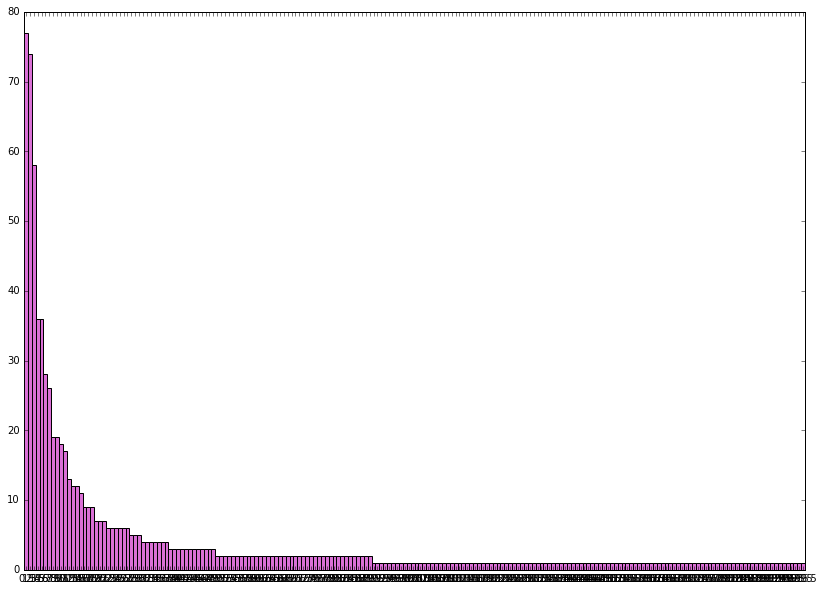

In [6]:
freq=[freq for (word,freq) in top200]
#Get frequency of 200th most frequent word
w,minfreq=top200[199]

#Compute Relative Freq
rel_freq=[fr/minfreq for fr in freq]

#Plot relative frequency
pos = np.arange(200)
width = 1.0    
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
#ax.set_xticklabels([word for (word,freq) in top200])
plt.bar(pos,rel_freq , width, color='orchid')
plt.show()

The word frequency approximately follows zipf's law. We could see that the frequency of the word is proporation to it's rank on frequency count. To get a better idea of the zipf's law, let's adjust frequency by the rank of the word as per zipf's law (that is multiply the count by rank in order to get same value(theoretically) for all words).

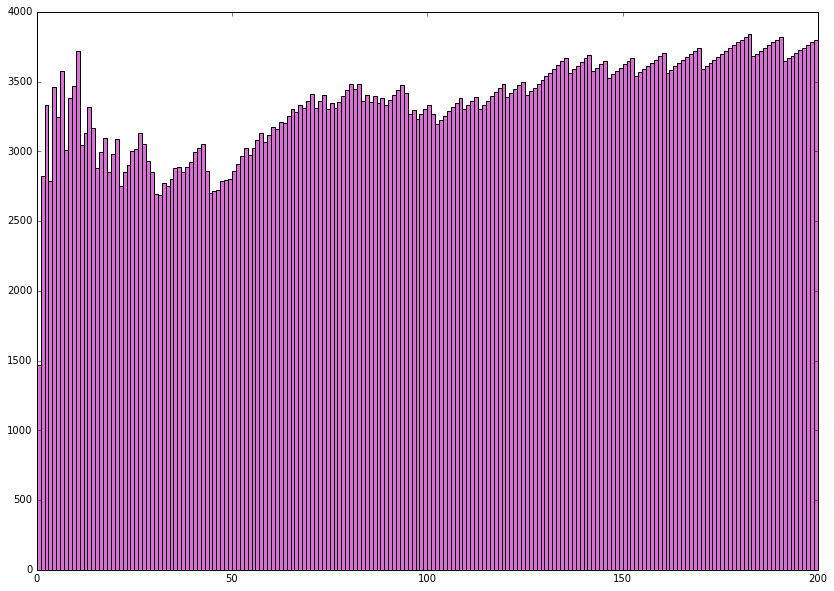

In [7]:
rank_freq=[fr*(ind+1) for ind,fr in enumerate(freq)]
plt.bar(pos,rank_freq , width, color='orchid')
plt.show()

As we could see from the above graph the rank adjusted frequency is approximately same which indicates the words are distributed as per zipf's law. 


### Compare frequency
Let's compare the frequency of words in the dataset with the words from web corpus of nltk


Number of words in nltk corpus: 396733


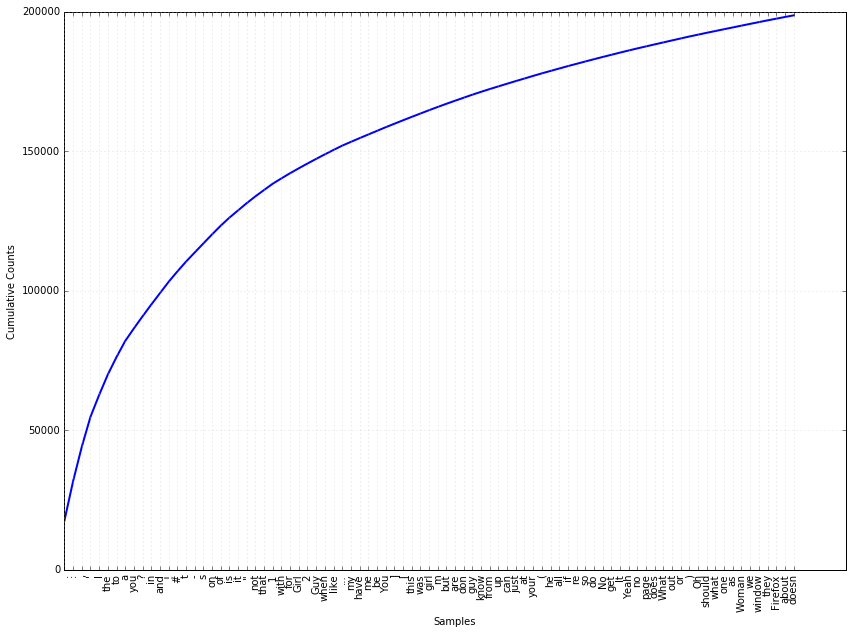

In [8]:
web_words=nltk.corpus.webtext.words()
print "Number of words in nltk corpus:",len(web_words)
web_freq=nltk.FreqDist(web_words)
web_freq.plot(85, cumulative=True)

The word frequency in the UCI dataset analyzed is similar to the word frequency in nltk webtext corpus. We could see that in both corpus the stop words have high frequency and about 85 most frequent unique words make 50% of the corpus. One difference that we could notice is that the webtext dataset seems to have high percent of stop words in the top frequency words compared to UCI dataset which has fewer stop words in the top frequency word list.
